Series

In [83]:
 series = {
   'index': [0,1,2,3],
   'data': [145,142,38,13],
   'name':'songs'
   }

In [84]:
def get (series,idx):
    value_idx = series['index'].index(idx)
    return series['data'][value_idx]

In [85]:
get(series,0)

145

In [86]:
songs = {
    'index':['Paul','John','George','Ringo'],
    'data':[145,142,38,13],
    'name':'counts'
}

In [87]:
get(songs,'Paul')

145

In [88]:
import pandas as pd
songs2 = pd.Series([145,142,38,13],name='counts')

In [89]:
songs2

0    145
1    142
2     38
3     13
Name: counts, dtype: int64

In [90]:
songs2.index

RangeIndex(start=0, stop=4, step=1)

In [91]:
songs3 = pd.Series([145,142,38,13],
                    name='counts',
                     index=['Paul','John','George','Ringo'])

In [92]:
songs3

Paul      145
John      142
George     38
Ringo      13
Name: counts, dtype: int64

In [93]:
songs3.index

Index(['Paul', 'John', 'George', 'Ringo'], dtype='object')

The NaN Value

In [94]:
import numpy as np
nan_series = pd.Series([2,np.nan],
                       index=['Ono','Clapton'])

In [95]:
nan_series

Ono        2.0
Clapton    NaN
dtype: float64

In [96]:
nan_series.count()

1

In [97]:
nan_series.size

2

In [98]:
songs3.mean()

84.5

In [99]:
mask = songs3 > songs3.mean()
mask

Paul       True
John       True
George    False
Ringo     False
Name: counts, dtype: bool

In [100]:
songs3[mask]

Paul    145
John    142
Name: counts, dtype: int64

categorical data

In [101]:
s = pd.Series(['m','l','xs','s','xl'], dtype='category')
s

0     m
1     l
2    xs
3     s
4    xl
dtype: category
Categories (5, object): ['l', 'm', 's', 'xl', 'xs']

In [102]:
s.cat.ordered

False

In [103]:
s.cat.reorder_categories(['xs','s','m','l','xl'],ordered=True)

0     m
1     l
2    xs
3     s
4    xl
dtype: category
Categories (5, object): ['xs' < 's' < 'm' < 'l' < 'xl']

Exercices

In [104]:
temp_lastweek = pd.Series([7,-2,4,6,7,5,4],
                          name='Temperature',
                          index=['Monday','Tuesday','Wednesday','Thurday','Friday','Saturday','Sunday'])

In [105]:
temp_lastweek

Monday       7
Tuesday     -2
Wednesday    4
Thurday      6
Friday       7
Saturday     5
Sunday       4
Name: Temperature, dtype: int64

In [106]:
Avg_temp_lastweek = temp_lastweek.mean()
Avg_temp_lastweek

4.428571428571429

In [107]:
Temp_above_weekavg =temp_lastweek > Avg_temp_lastweek
Temp_above_weekavg

Monday        True
Tuesday      False
Wednesday    False
Thurday       True
Friday        True
Saturday      True
Sunday       False
Name: Temperature, dtype: bool

In [108]:
temp_lastweek[Temp_above_weekavg]

Monday      7
Thurday     6
Friday      7
Saturday    5
Name: Temperature, dtype: int64

Series Deep Dive

In [109]:
df = pd.read_csv('vehicles.csv')


C:\Users\lenovo\AppData\Local\Temp\ipykernel_20396\2237580194.py:1: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('vehicles.csv')


In [110]:
city_mpg = df.city08

In [111]:
highway_mpg =df.highway08

In [112]:
city_mpg

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: int64

In [113]:
highway_mpg

0        25
1        14
2        33
3        12
4        23
         ..
41139    26
41140    28
41141    24
41142    24
41143    21
Name: highway08, Length: 41144, dtype: int64

Operators and Dunder Methods

In [114]:
 (2).__add__(4)

6

In [115]:
city_mpg.quantile([.1,.8,.9])

0.1    13.0
0.8    21.0
0.9    24.0
Name: city08, dtype: float64

In [116]:
city_mpg.gt(20).sum()

10272

In [117]:
city_mpg.agg(['mean', max ,min , np.var ])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20396\1106470582.py:1: FutureWarning: The provided callable <built-in function max> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  city_mpg.agg(['mean', max ,min , np.var ])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_20396\1106470582.py:1: FutureWarning: The provided callable <built-in function min> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  city_mpg.agg(['mean', max ,min , np.var ])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_20396\1106470582.py:1: FutureWarning: The provided callable <function var at 0x000002767BFF1B20> is currently using Series.var. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "var" instead.
  city_mpg.agg(['mean

mean     18.369045
max     150.000000
min       6.000000
var      62.503036
Name: city08, dtype: float64

Conversion methods

In [118]:
city_mpg.astype('Int64')

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: Int64

In [119]:

city_mpg.nbytes

329152

In [120]:
city_mpg.astype('int16').nbytes

82288

Manipulation Methods

In [121]:
make = df.make

In [122]:
make.value_counts()

make
Chevrolet                      4003
Ford                           3371
Dodge                          2583
GMC                            2494
Toyota                         2071
                               ... 
Volga Associated Automobile       1
Panos                             1
Mahindra                          1
Excalibur Autos                   1
London Coach Co Inc               1
Name: count, Length: 136, dtype: int64

In [123]:
top5 = make.value_counts().index[:5]
def generalise_top5(val):
    if val in top5:
        return val
    return 'Other'

In [124]:
%%time
make.apply(generalise_top5)

CPU times: total: 93.8 ms
Wall time: 115 ms


0        Other
1        Other
2        Dodge
3        Dodge
4        Other
         ...  
41139    Other
41140    Other
41141    Other
41142    Other
41143    Other
Name: make, Length: 41144, dtype: object

In [125]:
%%time
make.where(make.isin(top5),
           other='Other')

CPU times: total: 0 ns
Wall time: 5 ms


0        Other
1        Other
2        Dodge
3        Dodge
4        Other
         ...  
41139    Other
41140    Other
41141    Other
41142    Other
41143    Other
Name: make, Length: 41144, dtype: object

In [126]:
cyl = df.cylinders
cyl.isna().sum()

206

In [127]:
missing = cyl.isna()
make[missing]

7138     Nissan
7139     Toyota
8143     Toyota
8144       Ford
8146       Ford
          ...  
34563     Tesla
34564     Tesla
34565     Tesla
34566     Tesla
34567     Tesla
Name: make, Length: 206, dtype: object

In [128]:
cyl[missing]

7138    NaN
7139    NaN
8143    NaN
8144    NaN
8146    NaN
         ..
34563   NaN
34564   NaN
34565   NaN
34566   NaN
34567   NaN
Name: cylinders, Length: 206, dtype: float64

In [129]:
cyl.fillna(cyl.mean()).loc[7136:7141]

7136    6.000000
7137    6.000000
7138    5.717084
7139    5.717084
7140    6.000000
7141    6.000000
Name: cylinders, dtype: float64

In [130]:
display(cyl.interpolate())


0         4.0
1        12.0
2         4.0
3         8.0
4         4.0
         ... 
41139     4.0
41140     4.0
41141     4.0
41142     4.0
41143     4.0
Name: cylinders, Length: 41144, dtype: float64

In [131]:
city_mpg.clip(lower=city_mpg.quantile(.05),
              upper=city_mpg.quantile(.95))

0        19
1        11
2        23
3        11
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: int64

In [132]:
city_mpg.sort_values()

7901       6
34557      6
37161      6
21060      6
35887      6
        ... 
34563    138
34564    140
32599    150
31256    150
33423    150
Name: city08, Length: 41144, dtype: int64

In [133]:
make.replace('Subaru','スバル')

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4               スバル
            ...    
41139           スバル
41140           スバル
41141           スバル
41142           スバル
41143           スバル
Name: make, Length: 41144, dtype: object

In [134]:
'Ford'.lower()

'ford'

In [135]:
age = pd.Series(['0-10' ,'11-15','11-15','63-67','46-63'])
age

0     0-10
1    11-15
2    11-15
3    63-67
4    46-63
dtype: object

In [136]:
spl = age.str.split('-',expand=True).astype('int')

In [137]:
spl.iloc[:-1,1]

0    10
1    15
2    15
3    67
Name: 1, dtype: int32

In [138]:
spl.mean(axis='columns')

0     5.0
1    13.0
2    13.0
3    65.0
4    54.5
dtype: float64

In [139]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [140]:
import random 
def beetween(row):
    return random.randint(*row.values)
spl.apply(beetween,axis='columns')

0     8
1    15
2    15
3    67
4    52
dtype: int64

In [141]:
addone = spl.iloc[:,0] + 1
addone

0     1
1    12
2    12
3    64
4    47
Name: 0, dtype: int32

Plotting

In [142]:
%matplotlib inline

In [143]:
alta_df = pd.read_csv('alta-noaa-1980-2019.csv')
dates = pd.to_datetime(alta_df.DATE)
snow = (alta_df.SNOW.rename(dates))

In [144]:
alta_df

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,DASF,MDPR,MDSF,...,SNWD,TMAX,TMIN,TOBS,WT01,WT03,WT04,WT05,WT06,WT11
0,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-01,NaN,NaN,NaN,NaN,...,29.0,38.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-02,NaN,NaN,NaN,NaN,...,34.0,27.0,18.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-03,NaN,NaN,NaN,NaN,...,30.0,27.0,12.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-04,NaN,NaN,NaN,NaN,...,30.0,31.0,18.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-05,NaN,NaN,NaN,NaN,...,30.0,34.0,26.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14155,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,2019-09-03,NaN,NaN,NaN,NaN,...,0.0,74.0,57.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN
14156,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,2019-09-04,NaN,NaN,NaN,NaN,...,0.0,77.0,52.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
14157,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,2019-09-05,NaN,NaN,NaN,NaN,...,0.0,76.0,54.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN
14158,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,2019-09-06,NaN,NaN,NaN,NaN,...,0.0,66.0,52.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
snow

1980-01-01    2.0
1980-01-02    3.0
1980-01-03    1.0
1980-01-04    0.0
1980-01-05    0.0
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, Length: 14160, dtype: float64

<Axes: ylabel='Frequency'>

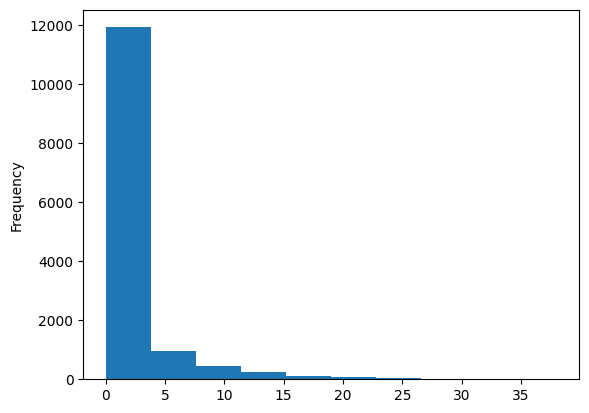

In [146]:
snow.plot.hist()

<Axes: title={'center': 'Snowfall Histogram (in)'}, ylabel='Frequency'>

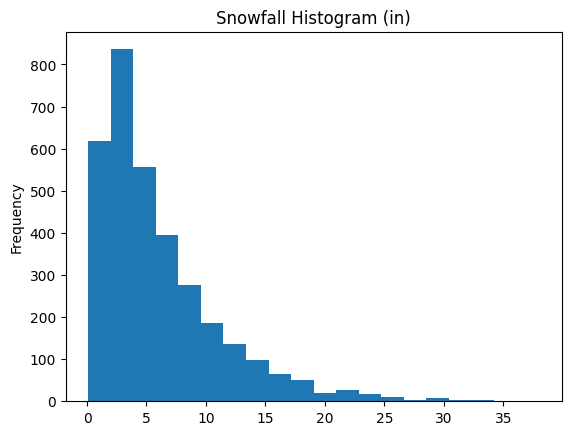

In [147]:
snow[snow >0].plot.hist(bins=20,title ='Snowfall Histogram (in)')

<Axes: ylabel='Density'>

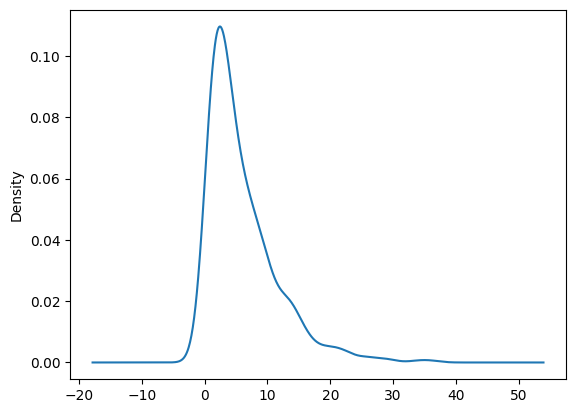

In [148]:
(snow[lambda s:
     (s.index.month == 1) & (s > 0)]
     .plot.kde())

<Axes: >

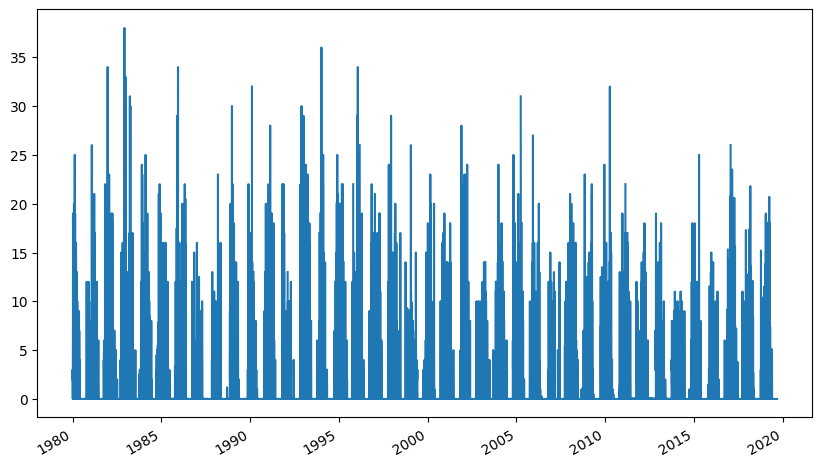

In [149]:
snow.plot.line(figsize=(10,6))

In [150]:
make

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
41139        Subaru
41140        Subaru
41141        Subaru
41142        Subaru
41143        Subaru
Name: make, Length: 41144, dtype: object

In [151]:
make.value_counts()

make
Chevrolet                      4003
Ford                           3371
Dodge                          2583
GMC                            2494
Toyota                         2071
                               ... 
Volga Associated Automobile       1
Panos                             1
Mahindra                          1
Excalibur Autos                   1
London Coach Co Inc               1
Name: count, Length: 136, dtype: int64

In [152]:
make.shape,make.nunique()

((41144,), 136)

In [153]:
make.value_counts

<bound method IndexOpsMixin.value_counts of 0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
41139        Subaru
41140        Subaru
41141        Subaru
41142        Subaru
41143        Subaru
Name: make, Length: 41144, dtype: object>

In [154]:
make.filter

<bound method NDFrame.filter of 0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
41139        Subaru
41140        Subaru
41141        Subaru
41142        Subaru
41143        Subaru
Name: make, Length: 41144, dtype: object>

Dataframes

In [155]:
df = {
    'index':[0,1,2],
    'cols':[
      {  'name':'growth',
        'data':[.5,.7,1.2] },
        {'name':'Name' ,
         'data':['Paul','George','Ringo'] },
    ]
}

In [156]:
df

{'index': [0, 1, 2],
 'cols': [{'name': 'growth', 'data': [0.5, 0.7, 1.2]},
  {'name': 'Name', 'data': ['Paul', 'George', 'Ringo']}]}

In [157]:
df = pd.DataFrame({
    'growth':[.5,.7,1.2],
    'Name':['Paul','George','Ringo']})

In [158]:
df

,growth,Name
0,0.5,Paul
1,0.7,George
2,1.2,Ringo


In [159]:
df.Name

0      Paul
1    George
2     Ringo
Name: Name, dtype: object

In [160]:
df.iloc[2]

growth      1.2
Name      Ringo
Name: 2, dtype: object

In [161]:
import numpy as numpy
np.random.seed(42)
pd.DataFrame(np.random.randn(10,3),
             columns=['a','b','c'])

,a,b,c
0,0.496714,-0.138264,0.647689
1,1.523030,-0.234153,-0.234137
2,1.579213,0.767435,-0.469474
3,0.542560,-0.463418,-0.465730
4,0.241962,-1.913280,-1.724918
5,-0.562288,-1.012831,0.314247
6,-0.908024,-1.412304,1.465649
7,-0.225776,0.067528,-1.424748
8,-0.544383,0.110923,-1.150994
9,0.375698,-0.600639,-0.291694
